In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data = pd.read_csv('echocardiogram.csv')
data.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


In [62]:
data = data.drop(['name', 'group', 'aliveat1'], axis=1)
data.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571


In [63]:
data.isnull().sum()


survival                 3
alive                    2
age                      7
pericardialeffusion      1
fractionalshortening     9
epss                    16
lvdd                    12
wallmotion-score         5
wallmotion-index         3
mult                     4
dtype: int64

In [64]:
features_with_null = [features for features in data.columns if data[features].isnull().sum()>0]
for feature in features_with_null:
    print(feature, ':', round(data[feature].isnull().mean(), 4), '%')

survival : 0.0226 %
alive : 0.015 %
age : 0.0526 %
pericardialeffusion : 0.0075 %
fractionalshortening : 0.0677 %
epss : 0.1203 %
lvdd : 0.0902 %
wallmotion-score : 0.0376 %
wallmotion-index : 0.0226 %
mult : 0.0301 %


In [65]:
for feature in features_with_null:
    print(feature, ':', data[feature].unique())

survival : [1.10e+01 1.90e+01 1.60e+01 5.70e+01 2.60e+01 1.30e+01 5.00e+01 2.50e+01
 1.00e+01 5.20e+01 4.40e+01 5.00e-01 2.40e+01 2.20e+01 1.00e+00 7.50e-01
 5.00e+00 4.80e+01 2.90e+01 2.50e-01 3.60e+01 3.00e+00 2.70e+01 3.50e+01
 3.10e+01 3.20e+01 4.00e+01 4.60e+01 2.00e+00 3.70e+01 1.95e+01 2.00e+01
      nan 7.00e+00 1.20e+01 4.50e+01 5.30e+01 3.80e+01 9.00e+00 4.90e+01
 4.70e+01 4.10e+01 3.30e+01 1.50e+01 3.00e-02 2.30e+01 3.40e+01 2.10e+01
 5.50e+01 4.00e+00 1.25e+00 2.80e+01 1.70e+01 7.50e+00]
alive : [ 0.  1. nan]
age : [71.    72.    55.    60.    57.    68.    62.    46.    54.    77.
 73.    69.    62.529 66.    85.    64.    35.    75.    65.    52.
    nan 47.    63.    61.    80.    70.    79.    56.    67.    81.
 59.    58.    51.    50.    78.    86.    74.    53.    48.   ]
pericardialeffusion : [ 0.  1. 77. nan]
fractionalshortening : [0.26  0.38  0.253 0.16  0.23  0.33  0.34  0.14  0.13  0.45  0.15  0.12
 0.25  0.07  0.09  0.22  0.18  0.17  0.19  0.3     nan 0.21  0.

In [66]:
data = data.dropna(subset=['alive'])
data['alive'].isnull().sum()

0

In [67]:
discrete_features = ['pericardialeffusion']
continuous_features = data.drop(['pericardialeffusion', 'alive'], axis=1).columns
label = ['alive']

print(continuous_features)

Index(['survival', 'age', 'fractionalshortening', 'epss', 'lvdd',
       'wallmotion-score', 'wallmotion-index', 'mult'],
      dtype='object')


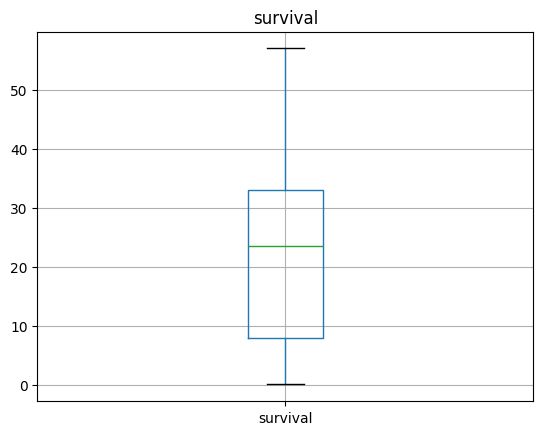

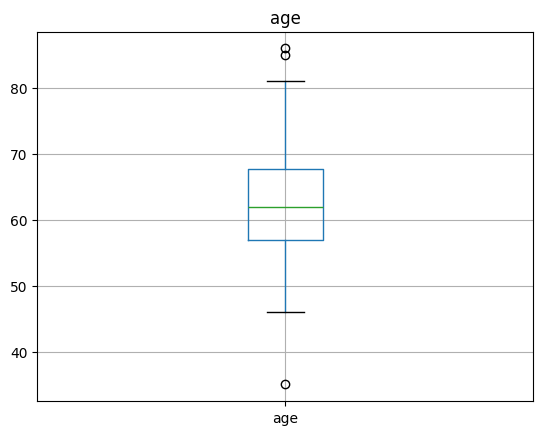

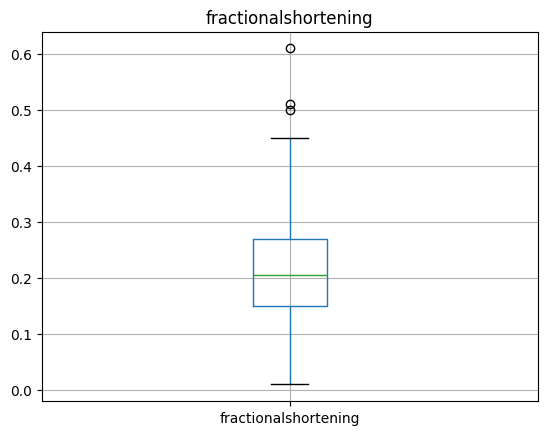

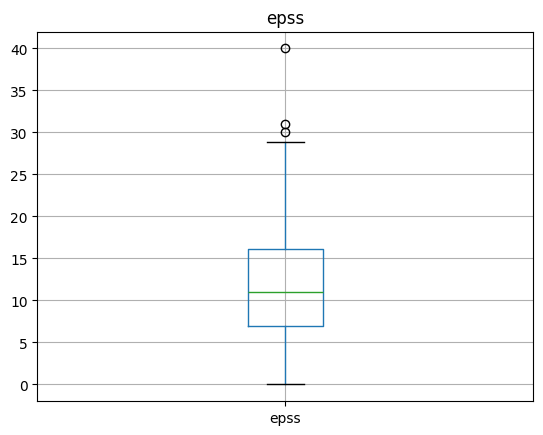

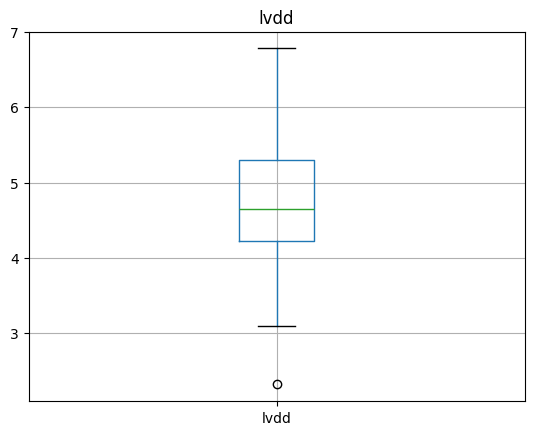

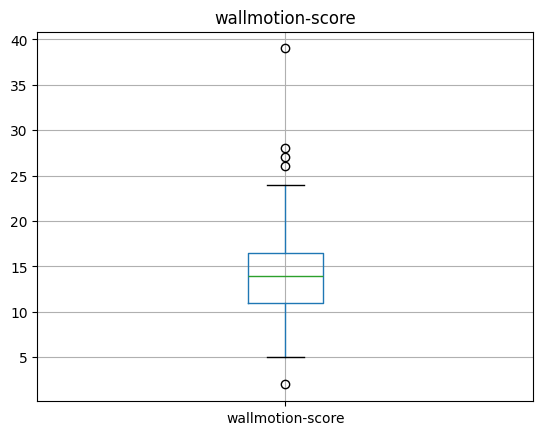

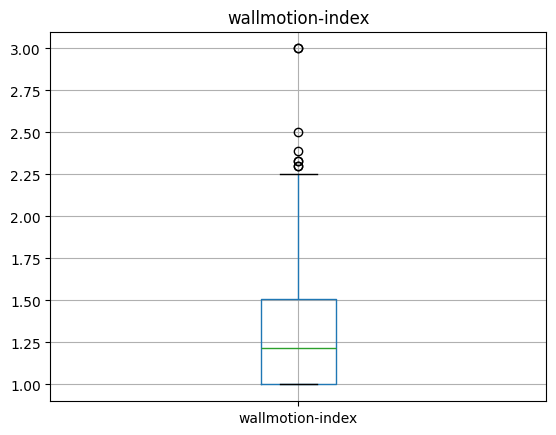

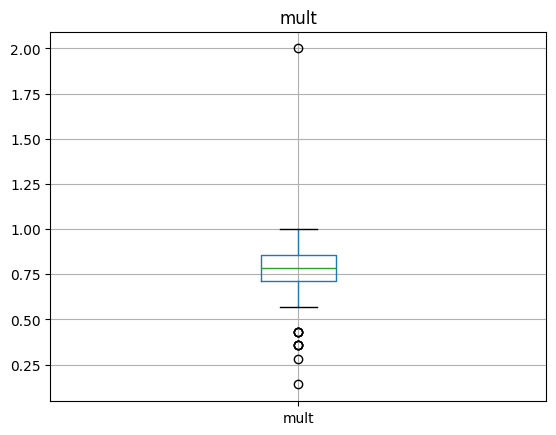

In [68]:
for feature in continuous_features:
    data.boxplot(feature)
    plt.title(feature)
    plt.show()

In [69]:
features_with_outliers = ['wallmotion-score', 'wallmotion-index', 'mult']


In [70]:
for feature in continuous_features:
    if feature in features_with_outliers:
        data[feature].fillna(data[feature].median(), inplace=True)
    else:
        data[feature].fillna(data[feature].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_22340\4048376697.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(data[feature].mean(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22340\4048376697.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [71]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
outliers_rows = lof.fit_predict(data)

In [72]:
mask = outliers_rows != -1


In [73]:
data.isnull().sum()


survival                0
alive                   0
age                     0
pericardialeffusion     0
fractionalshortening    0
epss                    0
lvdd                    0
wallmotion-score        0
wallmotion-index        0
mult                    0
dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [75]:
data = data[mask]


In [76]:
from sklearn.preprocessing import StandardScaler

data1 = pd.get_dummies(data, columns = discrete_features, drop_first = True)
scaler = StandardScaler()

data1[continuous_features] = scaler.fit_transform(data1[continuous_features])

In [77]:
data1.head()

,survival,alive,age,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,pericardialeffusion_1.0
0,-0.729968,0.0,1.039461,0.419602,-0.470229,-0.190540,-0.050728,-0.856557,1.156755,False
1,-0.221716,0.0,1.170502,1.580619,-0.940477,-0.839869,-0.050728,0.769979,-0.939966,False
2,-0.412311,0.0,-1.057203,0.419602,-1.253976,-1.722956,-0.050728,-0.856557,1.156755,False
3,2.192480,0.0,-0.401996,0.351875,0.009737,-0.186644,0.392359,0.189073,0.077860,False
4,-0.221716,1.0,-0.795120,-0.547913,1.567512,1.302915,0.835445,2.047971,-1.026482,False


In [78]:
X = data1.drop(['alive'], axis=1)
y = data1['alive']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((88, 9), (39, 9))

In [80]:
accuracy = {}


In [81]:
model1 = LogisticRegression(max_iter=200)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(model1)] = accuracy_score(y_test, y_pred1)*100

0.8461538461538461


In [82]:
model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(accuracy_score(y_test, y_pred2))
accuracy[str(model2)] = accuracy_score(y_test, y_pred2)*100


0.8974358974358975


In [83]:
model3 = RandomForestClassifier(max_depth=6)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(accuracy_score(y_test, y_pred3))
accuracy[str(model3)] = accuracy_score(y_test, y_pred3)*100

0.9230769230769231


In [84]:
model4 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(accuracy_score(y_test, y_pred4))
accuracy[str(model4)] = accuracy_score(y_test, y_pred4)*100

0.8717948717948718


In [85]:
accuracy

{'LogisticRegression(max_iter=200)': 84.61538461538461,
 'DecisionTreeClassifier(max_depth=3)': 89.74358974358975,
 'RandomForestClassifier(max_depth=6)': 92.3076923076923,
 'GradientBoostingClassifier(n_estimators=300)': 87.17948717948718}

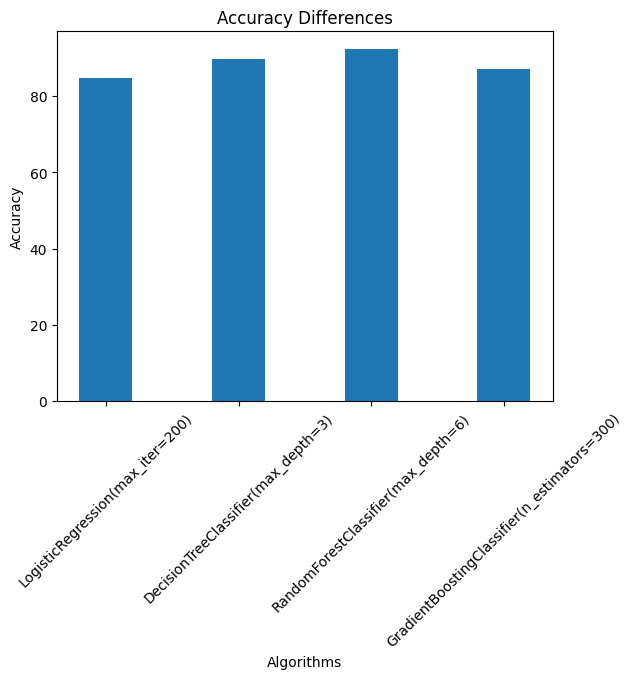

In [86]:
algos = list(accuracy.keys())
accu_val = list(accuracy.values())

plt.bar(algos, accu_val, width=0.4)
plt.title('Accuracy Differences')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [87]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
import xgboost

In [88]:
param_combinations = {
    'learning_rate': np.arange(0.05, 0.4, 0.05),
    'max_depth': np.arange(3, 10),
    'min_child_weight': np.arange(1, 7, 2),
    'gamma': np.arange(0.0, 0.5, 0.1),
}

XGB = xgboost.XGBClassifier()
perfect_params = RandomizedSearchCV(XGB, param_distributions=param_combinations, n_iter=6, n_jobs=-1, scoring='roc_auc')

perfect_params.fit(X, y)
perfect_params.best_params_

{'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.2}

In [89]:
model5 = xgboost.XGBClassifier(min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.0)
score = cross_val_score(model5, X, y, cv=10)
model5.fit(X, y)
model5.save_model("xgboost_model.json")

In [90]:
print(score)
print('Mean: ', score.mean())

[0.84615385 0.92307692 1.         0.76923077 0.84615385 1.
 1.         0.83333333 0.83333333 0.66666667]
Mean:  0.8717948717948717


In [91]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current working directory:", current_directory)

# List files in the current directory
files_in_directory = os.listdir(current_directory)
print("Files in current directory:", files_in_directory)

Current working directory: c:\Users\user\Desktop\Senior Project\echocardiogram
Files in current directory: ['.devcontainer', '.git', 'app.py', 'decision_tree.ipynb', 'echocardiogram.csv', 'echocardiogram.data', 'echocardiogram.names', 'heart_disease_model.pkl', 'Index', 'preproc.py', 'processed_echocardiogram.csv', 'requirements.txt', 'test.ipynb', 'usecasetester.py', 'xgboost_model.bin', 'xgboost_model.json', '__pycache__']
